In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/pca_mf.csv', encoding="UTF-8")
data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.000000,0.044444,0.098039,0.00,0.00,0.394737,0.778325,0.174312,0.233728,0.250836,0.145038,0.313653,0.37500,0.379433,0.327957,0.649606,0.139024,0.160991,0.545,0.131336,0.188,0.033333,0.577629,0.125369,0.562102,0.462185,False,-0.401713,0.140220
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.135135,0.144444,0.098039,0.32,0.38,0.486842,0.889163,0.342508,0.880671,0.304348,0.038168,0.533210,0.43750,0.510638,0.602151,0.986877,0.729268,0.549536,0.843,0.714286,0.336,0.133333,0.988314,0.053097,1.000000,0.519808,False,-0.245366,1.125750
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.045045,0.133333,0.568627,0.04,0.06,0.355263,0.625616,0.801223,0.303748,0.374582,0.221374,0.797048,0.19250,0.507092,0.338710,0.518373,0.378049,0.405573,0.593,0.391705,0.436,0.181481,0.460768,0.228614,0.531051,0.300120,False,0.455640,0.540882
3,Robert Andrich,MF,Union Berlin,24,28.6,0.027027,0.077778,0.137255,0.04,0.14,0.407895,0.435961,0.330275,0.288955,0.374582,0.160305,0.503690,0.48875,0.159574,0.666667,0.353018,0.229268,0.205882,0.711,0.241935,0.196,0.103704,0.195326,0.148968,0.880573,0.703481,False,-0.189489,0.061902
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.036036,0.188889,0.235294,0.04,0.10,0.276316,0.438424,0.467890,0.059172,0.364548,0.221374,0.538745,0.29625,0.177305,0.188172,0.208661,0.319512,0.452012,0.450,0.345622,0.358,0.596296,0.158598,0.253687,0.259554,0.471789,False,0.607400,-0.121917


In [2]:
pcas = data[['PC1', 'PC2']]
pcas.head()

,PC1,PC2
0,-0.401713,0.140220
1,-0.245366,1.125750
2,0.455640,0.540882
3,-0.189489,0.061902
4,0.607400,-0.121917


Text(0, 0.5, 'Inertia')

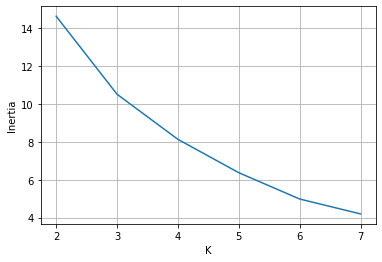

In [3]:
inertias = []
clusters = range(2, 8)
for k in clusters:
    k2 = KMeans(n_clusters=k)
    k2.fit(pcas)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(inertias, index=clusters).plot(ax=ax)
plt.grid()
ax.set_xlabel('K')
ax.set_ylabel('Inertia')

In [4]:
# nach K=5 nur noch geringe Abnahme, daher K=5 Cluster erstellen

km = KMeans(5)
km.fit(pcas)
KMeans(algorithm='auto', copy_x=True, max_iter=300, n_clusters=5, n_init=10, n_jobs=1,
      precompute_distances='auto')

KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto')

In [5]:
X_km = km.predict(pcas)
X_km

array([2, 0, 3, 4, 1, 4, 2, 2, 2, 1, 4, 2, 1, 0, 3, 0, 1, 1, 2, 3, 1, 0,
       0, 1, 1, 4, 2, 1, 1, 4, 4, 2, 4, 3, 2, 2, 2, 4, 3, 3, 4, 1, 1, 2,
       4, 1, 2, 0, 4, 4, 2, 4, 4, 4, 1, 2, 2, 4, 1, 4, 3, 4, 3, 1, 3, 2,
       1, 1, 4, 4, 1, 0, 1, 2, 4, 4, 1, 2, 2, 4, 1, 1, 0, 1, 1, 4, 2, 2,
       4, 1, 4], dtype=int32)

In [6]:
clusters = pd.DataFrame(X_km)
data = pd.concat([data, clusters], axis=1)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,0
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.000000,0.044444,0.098039,0.00,0.00,0.394737,0.778325,0.174312,0.233728,0.250836,0.145038,0.313653,0.37500,0.379433,0.327957,0.649606,0.139024,0.160991,0.545,0.131336,0.188,0.033333,0.577629,0.125369,0.562102,0.462185,False,-0.401713,0.140220,2
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.135135,0.144444,0.098039,0.32,0.38,0.486842,0.889163,0.342508,0.880671,0.304348,0.038168,0.533210,0.43750,0.510638,0.602151,0.986877,0.729268,0.549536,0.843,0.714286,0.336,0.133333,0.988314,0.053097,1.000000,0.519808,False,-0.245366,1.125750,0
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.045045,0.133333,0.568627,0.04,0.06,0.355263,0.625616,0.801223,0.303748,0.374582,0.221374,0.797048,0.19250,0.507092,0.338710,0.518373,0.378049,0.405573,0.593,0.391705,0.436,0.181481,0.460768,0.228614,0.531051,0.300120,False,0.455640,0.540882,3
3,Robert Andrich,MF,Union Berlin,24,28.6,0.027027,0.077778,0.137255,0.04,0.14,0.407895,0.435961,0.330275,0.288955,0.374582,0.160305,0.503690,0.48875,0.159574,0.666667,0.353018,0.229268,0.205882,0.711,0.241935,0.196,0.103704,0.195326,0.148968,0.880573,0.703481,False,-0.189489,0.061902,4
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.036036,0.188889,0.235294,0.04,0.10,0.276316,0.438424,0.467890,0.059172,0.364548,0.221374,0.538745,0.29625,0.177305,0.188172,0.208661,0.319512,0.452012,0.450,0.345622,0.358,0.596296,0.158598,0.253687,0.259554,0.471789,False,0.607400,-0.121917,1
5,Maximilian Arnold,MF,Wolfsburg,25,31.3,0.117117,0.088889,0.372549,0.12,0.24,0.513158,0.524631,0.663609,0.307692,0.287625,0.167939,0.714022,0.33125,0.418440,0.365591,0.422572,0.170732,0.148607,0.733,0.161290,0.166,0.037037,0.268781,0.296460,0.657643,0.642257,False,0.048945,0.154792,4
6,Charles Aránguiz,MF,Leverkusen,30,23.5,0.036036,0.066667,0.156863,0.14,0.50,0.421053,0.798030,0.299694,0.550296,0.127090,0.000000,0.330258,0.46625,0.599291,0.500000,0.686352,0.134146,0.145511,0.591,0.138249,0.170,0.048148,0.662771,0.038348,0.792994,0.410564,False,-0.572753,0.342331,2
7,Daniel Baier,MF,Augsburg,35,21.6,0.045045,0.022222,0.039216,0.12,0.50,0.473684,0.588670,0.113150,0.210059,0.140468,0.000000,0.282288,0.30625,0.099291,0.768817,0.309711,0.124390,0.106811,0.733,0.117512,0.138,0.033333,0.133556,0.033923,0.968153,0.669868,False,-0.523714,-0.257320,2
8,Julian Baumgartlinger,MF,Leverkusen,31,19.9,0.090090,0.100000,0.196078,0.24,0.40,0.460526,0.906404,0.214067,0.316568,0.167224,0.000000,0.297048,0.33125,0.524823,0.322581,0.524934,0.109756,0.077399,0.900,0.103687,0.110,0.000000,0.492487,0.036873,0.601911,0.631453,False,-0.521125,0.016118,2
9,Christoph Baumgartner,MF,Hoffenheim,19,16.6,0.378378,0.533333,0.274510,0.26,0.30,0.368421,0.440887,0.330275,0.085799,0.140468,0.045802,0.577491,0.26750,0.276596,0.295699,0.251969,0.324390,0.503096,0.407,0.347926,0.216,0.311111,0.255426,0.088496,0.226115,0.512605,False,0.536589,-0.314158,1


In [7]:
data.rename(columns={0: 'Cluster'}, inplace=True)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,Cluster
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.000000,0.044444,0.098039,0.00,0.00,0.394737,0.778325,0.174312,0.233728,0.250836,0.145038,0.313653,0.37500,0.379433,0.327957,0.649606,0.139024,0.160991,0.545,0.131336,0.188,0.033333,0.577629,0.125369,0.562102,0.462185,False,-0.401713,0.140220,2
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.135135,0.144444,0.098039,0.32,0.38,0.486842,0.889163,0.342508,0.880671,0.304348,0.038168,0.533210,0.43750,0.510638,0.602151,0.986877,0.729268,0.549536,0.843,0.714286,0.336,0.133333,0.988314,0.053097,1.000000,0.519808,False,-0.245366,1.125750,0
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.045045,0.133333,0.568627,0.04,0.06,0.355263,0.625616,0.801223,0.303748,0.374582,0.221374,0.797048,0.19250,0.507092,0.338710,0.518373,0.378049,0.405573,0.593,0.391705,0.436,0.181481,0.460768,0.228614,0.531051,0.300120,False,0.455640,0.540882,3
3,Robert Andrich,MF,Union Berlin,24,28.6,0.027027,0.077778,0.137255,0.04,0.14,0.407895,0.435961,0.330275,0.288955,0.374582,0.160305,0.503690,0.48875,0.159574,0.666667,0.353018,0.229268,0.205882,0.711,0.241935,0.196,0.103704,0.195326,0.148968,0.880573,0.703481,False,-0.189489,0.061902,4
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.036036,0.188889,0.235294,0.04,0.10,0.276316,0.438424,0.467890,0.059172,0.364548,0.221374,0.538745,0.29625,0.177305,0.188172,0.208661,0.319512,0.452012,0.450,0.345622,0.358,0.596296,0.158598,0.253687,0.259554,0.471789,False,0.607400,-0.121917,1
5,Maximilian Arnold,MF,Wolfsburg,25,31.3,0.117117,0.088889,0.372549,0.12,0.24,0.513158,0.524631,0.663609,0.307692,0.287625,0.167939,0.714022,0.33125,0.418440,0.365591,0.422572,0.170732,0.148607,0.733,0.161290,0.166,0.037037,0.268781,0.296460,0.657643,0.642257,False,0.048945,0.154792,4
6,Charles Aránguiz,MF,Leverkusen,30,23.5,0.036036,0.066667,0.156863,0.14,0.50,0.421053,0.798030,0.299694,0.550296,0.127090,0.000000,0.330258,0.46625,0.599291,0.500000,0.686352,0.134146,0.145511,0.591,0.138249,0.170,0.048148,0.662771,0.038348,0.792994,0.410564,False,-0.572753,0.342331,2
7,Daniel Baier,MF,Augsburg,35,21.6,0.045045,0.022222,0.039216,0.12,0.50,0.473684,0.588670,0.113150,0.210059,0.140468,0.000000,0.282288,0.30625,0.099291,0.768817,0.309711,0.124390,0.106811,0.733,0.117512,0.138,0.033333,0.133556,0.033923,0.968153,0.669868,False,-0.523714,-0.257320,2
8,Julian Baumgartlinger,MF,Leverkusen,31,19.9,0.090090,0.100000,0.196078,0.24,0.40,0.460526,0.906404,0.214067,0.316568,0.167224,0.000000,0.297048,0.33125,0.524823,0.322581,0.524934,0.109756,0.077399,0.900,0.103687,0.110,0.000000,0.492487,0.036873,0.601911,0.631453,False,-0.521125,0.016118,2
9,Christoph Baumgartner,MF,Hoffenheim,19,16.6,0.378378,0.533333,0.274510,0.26,0.30,0.368421,0.440887,0.330275,0.085799,0.140468,0.045802,0.577491,0.26750,0.276596,0.295699,0.251969,0.324390,0.503096,0.407,0.347926,0.216,0.311111,0.255426,0.088496,0.226115,0.512605,False,0.536589,-0.314158,1


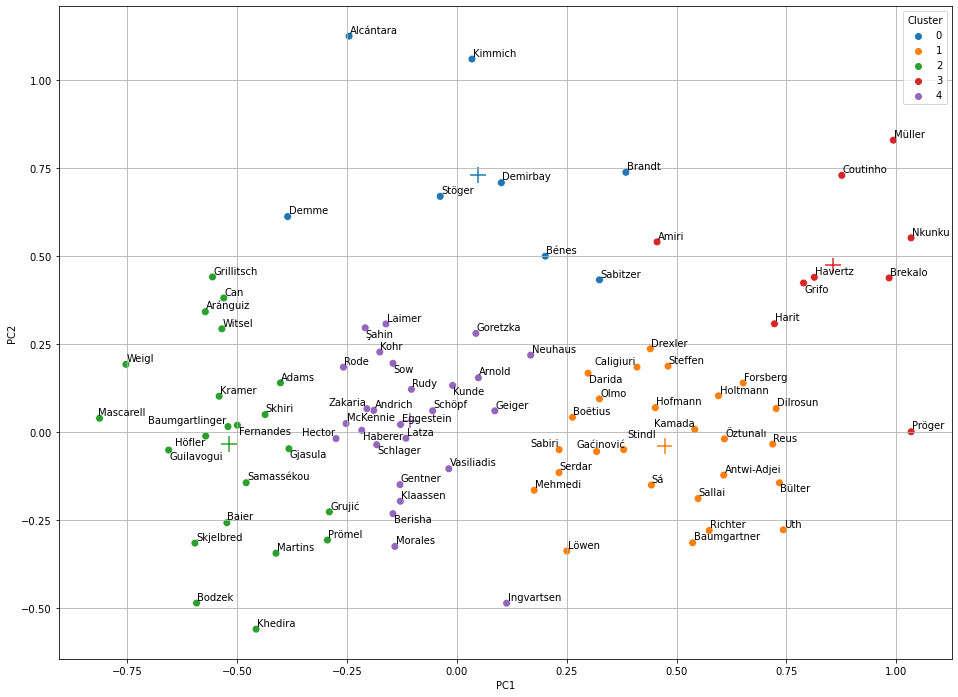

In [8]:
from adjustText import adjust_text
import seaborn as sns

x=data['PC1']
y=data['PC2']
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

plt.figure(figsize=(16,12))
plt.grid()
sns.scatterplot(x=x, y=y, hue=data['Cluster'], s=60, palette='tab10')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', s=250, c=colors)

surnames = data['Player'].str.split(' ').str[-1]
labels = [plt.text(x_coor, y_coor, f'{i}') for (x_coor, y_coor, i) in zip(x, y, surnames)]

adjust_text(labels)
plt.savefig('K_MF.png')
plt.show()

In [9]:
org_data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_mf.csv', encoding="UTF-8")
org_data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.00,0.04,0.05,0.00,0.00,-0.04,85.1,0.57,2.83,0.75,0.19,1.70,30.0,30.9,0.66,76.7,0.57,1.04,54.5,0.57,0.94,0.09,52.3,0.85,10.00,38.5,False
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.15,0.13,0.05,0.16,0.38,0.03,89.6,1.12,9.39,0.91,0.05,2.89,35.0,34.6,1.17,102.4,2.99,3.55,84.3,3.10,1.68,0.36,76.9,0.36,15.50,43.3,False
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.05,0.12,0.29,0.02,0.06,-0.07,78.9,2.62,3.54,1.12,0.29,4.32,15.4,34.5,0.68,66.7,1.55,2.62,59.3,1.70,2.18,0.49,45.3,1.55,9.61,25.0,False
3,Robert Andrich,MF,Union Berlin,24,28.6,0.03,0.07,0.07,0.02,0.14,-0.03,71.2,1.08,3.39,1.12,0.21,2.73,39.1,24.7,1.29,54.1,0.94,1.33,71.1,1.05,0.98,0.28,29.4,1.01,14.00,58.6,False
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.04,0.17,0.12,0.02,0.10,-0.13,71.3,1.53,1.06,1.09,0.29,2.92,23.7,25.2,0.40,43.1,1.31,2.92,45.0,1.50,1.79,1.61,27.2,1.72,6.20,39.3,False


In [10]:
org_data = pd.concat([org_data, clusters], axis=1)
org_data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,0
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.00,0.04,0.05,0.00,0.00,-0.04,85.1,0.57,2.83,0.75,0.19,1.70,30.0,30.9,0.66,76.7,0.57,1.04,54.5,0.57,0.94,0.09,52.3,0.85,10.00,38.5,False,2
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.15,0.13,0.05,0.16,0.38,0.03,89.6,1.12,9.39,0.91,0.05,2.89,35.0,34.6,1.17,102.4,2.99,3.55,84.3,3.10,1.68,0.36,76.9,0.36,15.50,43.3,False,0
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.05,0.12,0.29,0.02,0.06,-0.07,78.9,2.62,3.54,1.12,0.29,4.32,15.4,34.5,0.68,66.7,1.55,2.62,59.3,1.70,2.18,0.49,45.3,1.55,9.61,25.0,False,3
3,Robert Andrich,MF,Union Berlin,24,28.6,0.03,0.07,0.07,0.02,0.14,-0.03,71.2,1.08,3.39,1.12,0.21,2.73,39.1,24.7,1.29,54.1,0.94,1.33,71.1,1.05,0.98,0.28,29.4,1.01,14.00,58.6,False,4
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.04,0.17,0.12,0.02,0.10,-0.13,71.3,1.53,1.06,1.09,0.29,2.92,23.7,25.2,0.40,43.1,1.31,2.92,45.0,1.50,1.79,1.61,27.2,1.72,6.20,39.3,False,1
5,Maximilian Arnold,MF,Wolfsburg,25,31.3,0.13,0.08,0.19,0.06,0.24,0.05,74.8,2.17,3.58,0.86,0.22,3.87,26.5,32.0,0.73,59.4,0.70,0.96,73.3,0.70,0.83,0.10,33.8,2.01,11.20,53.5,False,4
6,Charles Aránguiz,MF,Leverkusen,30,23.5,0.04,0.06,0.08,0.07,0.50,-0.02,85.9,0.98,6.04,0.38,0.00,1.79,37.3,37.1,0.98,79.5,0.55,0.94,59.1,0.60,0.85,0.13,57.4,0.26,12.90,34.2,False,2
7,Daniel Baier,MF,Augsburg,35,21.6,0.05,0.02,0.02,0.06,0.50,0.02,77.4,0.37,2.59,0.42,0.00,1.53,24.5,23.0,1.48,50.8,0.51,0.69,73.3,0.51,0.69,0.09,25.7,0.23,15.10,55.8,False,2
8,Julian Baumgartlinger,MF,Leverkusen,31,19.9,0.10,0.09,0.10,0.12,0.40,0.01,90.3,0.70,3.67,0.50,0.00,1.61,26.5,35.0,0.65,67.2,0.45,0.50,90.0,0.45,0.55,0.00,47.2,0.25,10.50,52.6,False,2
9,Christoph Baumgartner,MF,Hoffenheim,19,16.6,0.42,0.48,0.14,0.13,0.30,-0.06,71.4,1.08,1.33,0.42,0.06,3.13,21.4,28.0,0.60,46.4,1.33,3.25,40.7,1.51,1.08,0.84,33.0,0.60,5.78,42.7,False,1


In [11]:
org_data.rename(columns={0: 'Cluster'}, inplace=True)
org_data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.00,0.04,0.05,0.00,0.00,-0.04,85.1,0.57,2.83,0.75,0.19,1.70,30.0,30.9,0.66,76.7,0.57,1.04,54.5,0.57,0.94,0.09,52.3,0.85,10.00,38.5,False,2
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.15,0.13,0.05,0.16,0.38,0.03,89.6,1.12,9.39,0.91,0.05,2.89,35.0,34.6,1.17,102.4,2.99,3.55,84.3,3.10,1.68,0.36,76.9,0.36,15.50,43.3,False,0
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.05,0.12,0.29,0.02,0.06,-0.07,78.9,2.62,3.54,1.12,0.29,4.32,15.4,34.5,0.68,66.7,1.55,2.62,59.3,1.70,2.18,0.49,45.3,1.55,9.61,25.0,False,3
3,Robert Andrich,MF,Union Berlin,24,28.6,0.03,0.07,0.07,0.02,0.14,-0.03,71.2,1.08,3.39,1.12,0.21,2.73,39.1,24.7,1.29,54.1,0.94,1.33,71.1,1.05,0.98,0.28,29.4,1.01,14.00,58.6,False,4
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.04,0.17,0.12,0.02,0.10,-0.13,71.3,1.53,1.06,1.09,0.29,2.92,23.7,25.2,0.40,43.1,1.31,2.92,45.0,1.50,1.79,1.61,27.2,1.72,6.20,39.3,False,1
5,Maximilian Arnold,MF,Wolfsburg,25,31.3,0.13,0.08,0.19,0.06,0.24,0.05,74.8,2.17,3.58,0.86,0.22,3.87,26.5,32.0,0.73,59.4,0.70,0.96,73.3,0.70,0.83,0.10,33.8,2.01,11.20,53.5,False,4
6,Charles Aránguiz,MF,Leverkusen,30,23.5,0.04,0.06,0.08,0.07,0.50,-0.02,85.9,0.98,6.04,0.38,0.00,1.79,37.3,37.1,0.98,79.5,0.55,0.94,59.1,0.60,0.85,0.13,57.4,0.26,12.90,34.2,False,2
7,Daniel Baier,MF,Augsburg,35,21.6,0.05,0.02,0.02,0.06,0.50,0.02,77.4,0.37,2.59,0.42,0.00,1.53,24.5,23.0,1.48,50.8,0.51,0.69,73.3,0.51,0.69,0.09,25.7,0.23,15.10,55.8,False,2
8,Julian Baumgartlinger,MF,Leverkusen,31,19.9,0.10,0.09,0.10,0.12,0.40,0.01,90.3,0.70,3.67,0.50,0.00,1.61,26.5,35.0,0.65,67.2,0.45,0.50,90.0,0.45,0.55,0.00,47.2,0.25,10.50,52.6,False,2
9,Christoph Baumgartner,MF,Hoffenheim,19,16.6,0.42,0.48,0.14,0.13,0.30,-0.06,71.4,1.08,1.33,0.42,0.06,3.13,21.4,28.0,0.60,46.4,1.33,3.25,40.7,1.51,1.08,0.84,33.0,0.60,5.78,42.7,False,1


In [12]:
org_data.to_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_mf.csv', encoding="UTF-8")

In [13]:
average = data.assign(cluster=clusters).groupby('cluster').agg('mean', 'var').T
average

cluster,0,1,2,3,4
Age,24.875000,24.923077,26.500000,23.888889,24.884615
90s,19.800000,17.361538,20.240909,21.466667,22.053846
Gls,0.087838,0.224186,0.040131,0.228228,0.082467
xG,0.130556,0.243590,0.056566,0.275309,0.108547
xA,0.348039,0.264706,0.085561,0.557734,0.193062
G/Sh,0.137500,0.236154,0.091818,0.211111,0.143077
G/SoT,0.175000,0.315769,0.210909,0.262222,0.227308
G-xG,0.422697,0.486336,0.437201,0.457602,0.440283
Cmp%,0.701047,0.462581,0.739140,0.538862,0.635373
KP,0.561927,0.404728,0.152210,0.711859,0.321219


In [14]:
passing = average.iloc[[4,9,11,12,13]]
passing

cluster,0,1,2,3,4
xA,0.348039,0.264706,0.085561,0.557734,0.193062
KP,0.561927,0.404728,0.152210,0.711859,0.321219
PPA,0.460284,0.311551,0.142597,0.536232,0.266401
CrsPA,0.153626,0.169113,0.027065,0.245971,0.105109
SCA,0.671587,0.525617,0.255032,0.817548,0.433437


In [15]:
dribbling = average.iloc[[17,18,19,21,22,23]]
dribbling

cluster,0,1,2,3,4
Touches,0.730807,0.283515,0.443808,0.435696,0.377801
Succ,0.399695,0.415385,0.182262,0.476965,0.259662
Att,0.345588,0.466897,0.165072,0.608531,0.248690
#Pl,0.394585,0.430521,0.179200,0.487199,0.262761
Carr into 1/3,0.351250,0.286615,0.146909,0.499778,0.260615
CPA,0.128241,0.263390,0.032155,0.295473,0.074786


In [16]:
defending = average.iloc[[14,15,16,26,27]]
defending

cluster,0,1,2,3,4
Tkl%,0.405000,0.311923,0.419545,0.275694,0.370769
%,0.472074,0.273186,0.381044,0.405437,0.351746
Int,0.479167,0.334367,0.584311,0.262246,0.486146
Recov,0.591162,0.378123,0.686016,0.283174,0.618141
Won%,0.541567,0.451981,0.670959,0.339336,0.543356


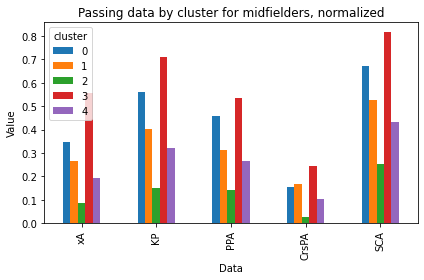

In [31]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
passing.plot(kind='bar', color=colors)
plt.title("Passing data by cluster for midfielders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('MF_Passing.png')

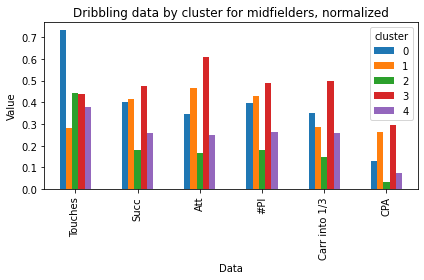

In [30]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
dribbling.plot(kind='bar', color=colors)
plt.title("Dribbling data by cluster for midfielders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('MF_Dribbling.png')

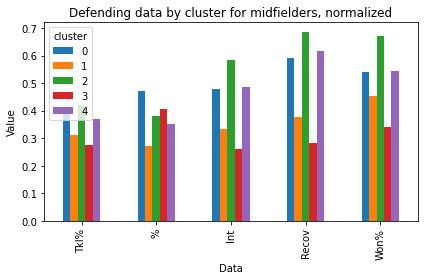

In [29]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
defending.plot(kind='bar', color=colors)
plt.title("Defending data by cluster for midfielders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('MF_Defending.png')

In [20]:
org_data[org_data['Cluster'] == 0]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
1,Thiago Alcántara,MF,Bayern Munich,28,19.7,0.15,0.13,0.05,0.16,0.38,0.03,89.6,1.12,9.39,0.91,0.05,2.89,35.0,34.6,1.17,102.4,2.99,3.55,84.3,3.10,1.68,0.36,76.9,0.36,15.50,43.3,False,0
13,Julian Brandt,MF,Dortmund,23,24.5,0.12,0.16,0.23,0.09,0.20,-0.04,83.2,1.55,4.49,2.04,0.04,3.14,34.4,31.3,0.49,81.1,2.57,3.67,70.0,2.73,2.16,0.53,66.2,0.94,7.63,43.2,False,0
15,László Bénes,MF,M'Gladbach,21,10.0,0.00,0.11,0.27,0.00,0.00,-0.11,76.4,2.50,5.80,1.10,0.30,5.00,35.3,30.2,1.30,62.2,1.20,1.60,75.0,1.20,1.30,0.20,40.6,2.40,8.60,50.0,False,0
21,Kerem Demirbay,MF,Leverkusen,26,17.5,0.06,0.16,0.22,0.03,0.13,-0.10,78.0,2.34,5.89,0.63,0.06,4.23,28.6,36.1,1.09,80.6,2.00,2.51,79.5,2.06,2.11,0.23,55.7,1.49,9.83,59.5,False,0
22,Diego Demme,MF,RB Leipzig,27,13.5,0.00,0.03,0.08,0.00,0.00,-0.03,86.7,0.89,6.30,1.11,0.07,2.44,37.2,31.9,0.89,91.5,0.89,1.56,57.1,1.04,1.63,0.44,69.6,0.44,10.30,37.0,True,0
47,Joshua Kimmich,MF,Bayern Munich,24,31.3,0.13,0.04,0.26,0.14,0.31,0.09,85.7,2.59,8.05,2.04,0.48,4.09,27.5,34.1,0.67,100.6,0.86,1.37,62.8,0.93,1.63,0.26,71.5,2.20,11.10,49.1,False,0
71,Marcel Sabitzer,MF,RB Leipzig,25,27.8,0.32,0.25,0.17,0.13,0.38,0.07,75.9,2.01,4.14,2.05,0.40,3.71,28.8,36.9,0.50,65.6,0.90,1.40,64.1,0.94,2.05,0.40,46.5,2.34,9.46,45.5,False,0
82,Kevin Stöger,MF,Düsseldorf,25,14.1,0.00,0.06,0.14,0.00,0.00,-0.06,80.2,1.70,5.32,1.13,0.21,3.62,32.4,33.0,1.42,79.1,1.70,2.20,77.4,1.70,1.49,0.35,53.6,1.70,10.50,33.3,False,0


In [21]:
org_data[org_data['Cluster'] == 1]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
4,Christopher Antwi-Adjei,MF,Paderborn 07,25,27.4,0.04,0.17,0.12,0.02,0.10,-0.13,71.3,1.53,1.06,1.09,0.29,2.92,23.7,25.2,0.40,43.1,1.31,2.92,45.0,1.50,1.79,1.61,27.2,1.72,6.20,39.3,False,1
9,Christoph Baumgartner,MF,Hoffenheim,19,16.6,0.42,0.48,0.14,0.13,0.30,-0.06,71.4,1.08,1.33,0.42,0.06,3.13,21.4,28.0,0.60,46.4,1.33,3.25,40.7,1.51,1.08,0.84,33.0,0.60,5.78,42.7,False,1
12,Jean-Paul Boëtius,MF,Mainz 05,25,25.2,0.16,0.12,0.13,0.11,0.33,0.04,76.0,1.43,3.73,0.91,0.04,2.66,30.8,25.3,0.95,51.1,1.71,2.62,65.2,1.83,1.43,0.60,32.9,0.60,9.68,25.5,False,1
16,Marius Bülter,MF,Union Berlin,26,25.8,0.27,0.10,0.15,0.18,0.47,0.17,62.7,1.09,1.05,0.85,0.39,1.86,22.7,26.6,0.54,40.6,2.56,4.11,62.3,2.67,1.05,0.81,25.3,2.33,7.44,32.1,False,1
17,Daniel Caligiuri,MF,Schalke 04,31,25.5,0.08,0.13,0.14,0.02,0.09,-0.05,63.9,1.53,1.80,1.29,0.24,3.33,34.7,32.2,0.82,55.8,1.76,3.53,50.0,1.88,1.61,0.67,31.2,1.88,9.80,51.7,False,1
20,Vladimír Darida,MF,Hertha BSC,28,25.1,0.12,0.12,0.15,0.07,0.21,0.00,73.1,1.91,3.07,0.96,0.40,3.35,14.9,27.5,0.96,58.5,1.24,2.03,60.8,1.43,1.43,0.24,37.4,1.75,9.24,32.8,False,1
23,Javairô Dilrosun,MF,Hertha BSC,21,14.5,0.28,0.13,0.08,0.21,0.67,0.14,72.3,0.90,2.00,0.69,0.34,1.79,28.6,23.4,1.31,42.1,3.31,4.55,72.7,3.52,2.00,1.24,26.5,2.34,7.52,21.1,False,1
24,Dominick Drexler,MF,Köln,29,17.6,0.17,0.14,0.19,0.15,0.38,0.03,73.1,1.53,1.93,1.82,0.63,3.30,28.6,29.4,1.25,49.5,1.31,2.27,57.5,1.31,1.70,0.74,31.6,2.16,9.26,36.0,False,1
27,Emil Forsberg,MF,RB Leipzig,27,12.7,0.39,0.34,0.21,0.13,0.38,0.06,79.7,2.20,3.31,0.71,0.08,4.02,26.9,30.2,0.47,53.1,2.05,2.44,83.9,2.13,2.13,0.94,40.5,0.87,5.43,31.8,False,1
28,Mijat Gaćinović,MF,Eint Frankfurt,24,11.6,0.00,0.18,0.10,0.00,0.00,-0.18,70.5,1.12,2.50,0.78,0.17,2.67,21.9,28.4,1.03,45.5,1.64,3.10,52.8,1.81,1.47,0.86,28.6,1.12,7.84,35.7,False,1


In [22]:
org_data[org_data['Cluster'] == 2]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,Tyler Adams,MF,RB Leipzig,20,10.6,0.00,0.04,0.05,0.00,0.00,-0.04,85.1,0.57,2.83,0.75,0.19,1.70,30.0,30.9,0.66,76.7,0.57,1.04,54.5,0.57,0.94,0.09,52.3,0.85,10.00,38.5,False,2
6,Charles Aránguiz,MF,Leverkusen,30,23.5,0.04,0.06,0.08,0.07,0.50,-0.02,85.9,0.98,6.04,0.38,0.00,1.79,37.3,37.1,0.98,79.5,0.55,0.94,59.1,0.60,0.85,0.13,57.4,0.26,12.90,34.2,False,2
7,Daniel Baier,MF,Augsburg,35,21.6,0.05,0.02,0.02,0.06,0.50,0.02,77.4,0.37,2.59,0.42,0.00,1.53,24.5,23.0,1.48,50.8,0.51,0.69,73.3,0.51,0.69,0.09,25.7,0.23,15.10,55.8,False,2
8,Julian Baumgartlinger,MF,Leverkusen,31,19.9,0.10,0.09,0.10,0.12,0.40,0.01,90.3,0.70,3.67,0.50,0.00,1.61,26.5,35.0,0.65,67.2,0.45,0.50,90.0,0.45,0.55,0.00,47.2,0.25,10.50,52.6,False,2
11,Adam Bodzek,MF,Düsseldorf,33,22.4,0.00,0.03,0.01,0.00,0.00,-0.03,82.4,0.27,2.50,0.18,0.00,0.76,24.2,32.7,0.94,40.1,0.18,0.27,66.7,0.18,0.31,0.00,21.4,0.13,10.30,57.4,False,2
18,Emre Can,MF,Dortmund,25,10.6,0.19,0.08,0.04,0.13,0.50,0.10,88.1,0.28,3.87,0.28,0.00,1.32,61.9,38.8,0.85,81.3,1.42,2.36,60.0,1.60,1.32,0.19,61.3,0.38,11.20,70.0,True,2
26,Edimilson Fernandes,MF,Mainz 05,23,16.5,0.06,0.05,0.04,0.05,0.50,0.01,84.9,0.48,3.82,0.42,0.06,1.94,48.6,28.4,1.88,57.2,0.91,1.64,55.6,0.97,0.42,0.00,34.8,0.55,11.30,53.8,False,2
31,Klaus Gjasula,MF,Paderborn 07,29,25.3,0.08,0.07,0.06,0.14,0.50,0.00,77.8,1.07,4.35,0.24,0.00,1.98,40.2,31.7,1.07,56.6,1.03,1.23,83.9,1.11,0.51,0.00,34.3,0.16,12.10,58.8,False,2
34,Florian Grillitsch,MF,Hoffenheim,23,26.8,0.00,0.04,0.09,0.00,0.00,-0.04,88.8,0.75,4.10,0.93,0.19,2.20,42.6,32.2,1.34,77.3,0.90,1.31,68.6,0.90,1.42,0.04,52.9,0.30,12.80,56.7,False,2
35,Marko Grujić,MF,Hertha BSC,23,26.8,0.15,0.16,0.02,0.11,0.31,-0.01,80.6,0.49,3.62,0.45,0.04,1.31,33.8,26.7,0.75,53.1,1.12,1.46,76.9,1.16,0.78,0.11,33.5,0.15,10.00,66.2,False,2


In [23]:
org_data[org_data['Cluster'] == 3]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
2,Nadiem Amiri,MF,Leverkusen,22,20.6,0.05,0.12,0.29,0.02,0.06,-0.07,78.9,2.62,3.54,1.12,0.29,4.32,15.4,34.5,0.68,66.7,1.55,2.62,59.3,1.70,2.18,0.49,45.3,1.55,9.61,25.0,False,3
14,Josip Brekalo,MF,Wolfsburg,21,18.6,0.16,0.19,0.31,0.07,0.20,-0.02,69.2,2.47,2.53,1.88,0.22,4.41,17.9,27.0,0.59,58.4,2.15,4.14,51.9,2.31,2.47,1.18,42.3,2.04,6.77,25.0,False,3
19,Philippe Coutinho,MF,Bayern Munich,27,15.7,0.51,0.49,0.22,0.13,0.27,0.02,81.8,1.97,7.26,2.17,0.06,4.97,25.0,39.1,0.38,68.2,2.87,4.39,65.2,3.12,2.42,0.96,54.5,1.15,5.86,37.5,False,3
33,Vincenzo Grifo,MF,Freiburg,26,18.0,0.22,0.17,0.26,0.06,0.18,0.06,72.4,1.94,2.11,1.22,0.33,4.11,20.0,26.7,0.67,70.0,0.00,5.00,0.0,0.00,5.00,0.00,50.0,5.00,5.00,0.0,False,3
38,Amine Harit,MF,Schalke 04,22,23.4,0.26,0.13,0.17,0.19,0.45,0.13,82.9,1.79,2.82,1.54,0.21,3.68,20.0,29.6,0.56,51.8,2.52,3.85,65.6,2.65,2.35,0.77,40.7,0.85,6.79,22.6,False,3
39,Kai Havertz,MF,Leverkusen,20,27.3,0.44,0.33,0.23,0.19,0.44,0.11,85.2,1.94,3.70,1.36,0.18,4.29,19.5,30.7,0.07,66.9,2.16,4.21,51.3,2.34,2.67,0.92,55.7,1.03,5.46,41.0,False,3
60,Thomas Müller,MF,Bayern Munich,29,25.1,0.32,0.33,0.51,0.15,0.40,-0.01,75.3,3.27,3.63,2.99,1.08,5.42,26.7,37.2,0.44,65.7,0.92,1.79,51.1,1.04,1.71,0.80,51.0,3.82,6.29,43.5,False,3
62,Christopher Nkunku,MF,RB Leipzig,21,21.4,0.23,0.35,0.42,0.10,0.22,-0.12,79.2,3.18,2.43,1.50,0.14,5.00,29.4,34.8,0.84,53.5,2.57,4.53,56.7,2.80,2.52,0.89,35.9,1.87,5.98,35.8,False,3
64,Kai Pröger,MF,Paderborn 07,27,23.1,0.09,0.12,0.15,0.04,0.14,-0.03,53.5,1.77,0.87,0.65,0.39,3.68,24.6,25.1,0.61,42.4,2.86,4.85,58.9,3.07,1.17,1.17,22.8,3.68,6.71,24.0,False,3


In [24]:
org_data[org_data['Cluster'] == 4]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
3,Robert Andrich,MF,Union Berlin,24,28.6,0.03,0.07,0.07,0.02,0.14,-0.03,71.2,1.08,3.39,1.12,0.21,2.73,39.1,24.7,1.29,54.1,0.94,1.33,71.1,1.05,0.98,0.28,29.4,1.01,14.00,58.6,False,4
5,Maximilian Arnold,MF,Wolfsburg,25,31.3,0.13,0.08,0.19,0.06,0.24,0.05,74.8,2.17,3.58,0.86,0.22,3.87,26.5,32.0,0.73,59.4,0.70,0.96,73.3,0.70,0.83,0.10,33.8,2.01,11.20,53.5,False,4
10,Valon Berisha,MF,Düsseldorf,26,10.5,0.00,0.07,0.06,0.00,0.00,-0.08,82.5,1.14,2.10,0.76,0.29,1.81,25.0,35.4,0.67,47.0,0.19,0.48,40.0,0.19,0.86,0.19,33.6,0.86,5.81,30.0,True,4
25,Maximilian Eggestein,MF,Werder Bremen,22,31.7,0.03,0.08,0.06,0.02,0.09,-0.05,77.6,0.91,3.97,1.14,0.16,2.18,28.6,27.0,0.79,57.8,0.66,1.39,47.7,0.66,1.96,0.22,38.1,0.60,10.10,44.2,False,4
29,Dennis Geiger,MF,Hoffenheim,21,12.6,0.00,0.10,0.16,0.00,0.00,-0.10,83.1,2.14,2.94,0.95,0.16,3.25,13.3,27.9,0.56,57.5,0.56,0.79,70.0,0.63,1.59,0.16,39.3,1.03,8.17,28.6,False,4
30,Christian Gentner,MF,Union Berlin,33,27.1,0.11,0.10,0.08,0.08,0.25,0.01,73.0,0.92,3.54,0.92,0.22,2.10,24.3,27.1,0.96,50.6,0.74,0.96,76.9,0.81,0.96,0.07,28.5,0.92,10.70,48.4,False,4
32,Leon Goretzka,MF,Bayern Munich,24,16.8,0.36,0.30,0.18,0.15,0.40,0.05,86.5,1.13,4.40,1.43,0.06,3.33,15.4,30.7,1.13,65.0,1.19,1.73,69.0,1.19,1.55,0.36,47.8,0.36,10.70,50.0,False,4
37,Janik Haberer,MF,Freiburg,25,19.1,0.10,0.05,0.04,0.14,0.50,0.05,84.0,0.73,3.46,0.58,0.05,2.36,24.0,29.8,0.89,57.9,0.99,1.47,67.9,1.05,1.31,0.21,37.2,0.47,12.10,37.4,False,4
40,Jonas Hector,MF,Köln,29,27.0,0.15,0.07,0.11,0.14,0.44,0.08,79.9,0.93,3.11,1.04,0.19,2.00,30.7,33.0,1.07,58.9,0.41,0.67,61.1,0.41,0.70,0.19,35.1,0.85,10.80,52.1,False,4
44,Marcus Ingvartsen,MF,Union Berlin,23,19.1,0.26,0.21,0.06,0.09,0.31,0.05,68.1,0.47,0.99,0.37,0.10,1.47,25.8,26.8,0.52,38.5,1.15,1.88,61.1,1.20,1.15,0.42,23.4,0.68,9.58,47.1,False,4
